### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Ignoring any warnings thrown during excecution (will not affect the execution)

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [3]:
from sklearn.datasets import load_digits
data = load_digits()

#### Printing the Target Names and Feature Names

In [4]:
print("Target Names:", data.target_names); print("")
print("Feature Names:", data.feature_names)

Target Names: [0 1 2 3 4 5 6 7 8 9]

Feature Names: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


#### Converting the dataset to a dataframe

In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


#### Plotting the data in the dataset

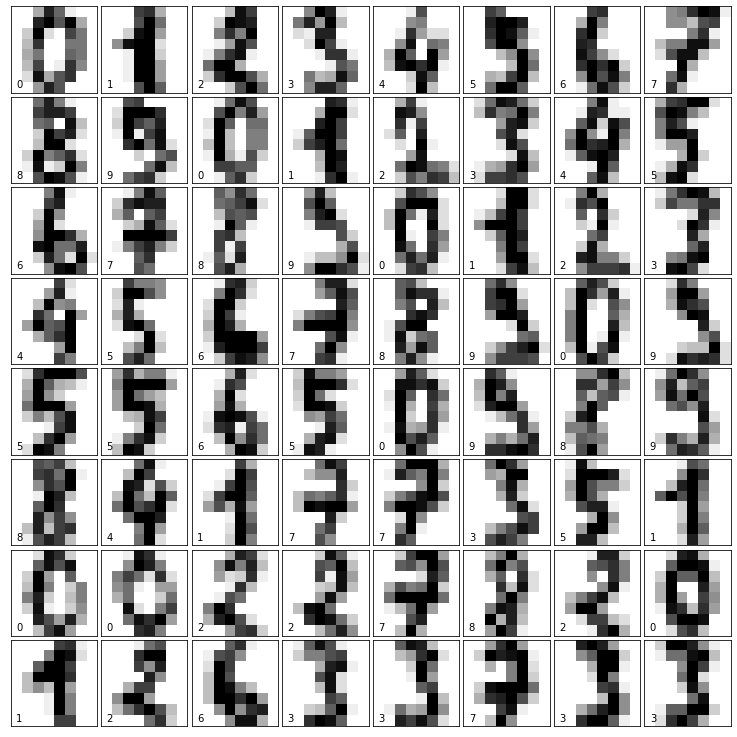

In [6]:
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(data.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(data.target[i]))

The dataset contains 64 8x8 images of digits in array form. The above figure is a visual representation of the dataset.

### Plot a Projection on the 2 First Principal Axis

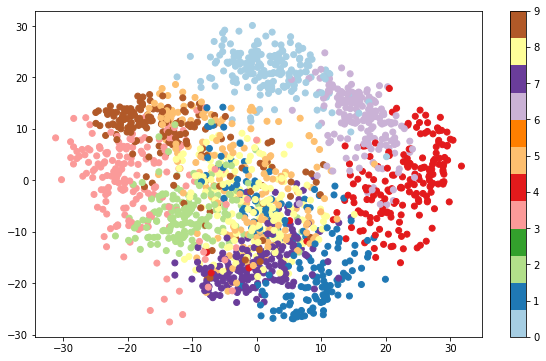

In [7]:
plt.figure(figsize=(10, 6))

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(data.data)
plt.scatter(proj[:, 0], proj[:, 1], c=data.target, cmap="Paired")
plt.colorbar()

The above scatter plot shows the clusters of all target values after reducing to 2 dimensions.

### Checking for Linear Separatability amongst targets using Linear Programming

In [8]:
from scipy.optimize import linprog

dic = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
    
for i in dic.keys():
    df["newTarget"] = np.where(df['Target'] == i, 1 , -1)
     
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    tmp = df.iloc[:,:-2].values
    tmp = sc.fit_transform(tmp)
 
    xx = np.array(df.newTarget.values.reshape(-1,1) * tmp)
    t = np.where(df['Target'] == i, 1 , -1)
     
    #2-D array which, when matrix-multiplied by x, gives the values of the upper-bound inequality constraints at x.
    A_ub = np.append(xx, t.reshape(-1,1), 1)
     
    #1-D array of values representing the upper-bound of each inequality constraint (row) in A_ub.
    b_ub = np.repeat(-1, A_ub.shape[0]).reshape(-1,1)
     
    # Coefficients of the linear objective function to be minimized.
    c_obj = np.repeat(1, A_ub.shape[1])
    res = linprog(c=c_obj, A_ub=A_ub, b_ub=b_ub,
                  options={"disp": False, "cholesky": False, "sym_pos": False})
     
    if res.success:
        print('"{}" is Linearly Separable from the rest.'.format(dic[i]))
    else:
        print('"{}" is NOT Linearly Separable from the rest.'.format(dic[i]))

"0" is Linearly Separable from the rest.
"1" is NOT Linearly Separable from the rest.
"2" is NOT Linearly Separable from the rest.
"3" is NOT Linearly Separable from the rest.
"4" is NOT Linearly Separable from the rest.
"5" is NOT Linearly Separable from the rest.
"6" is NOT Linearly Separable from the rest.
"7" is NOT Linearly Separable from the rest.
"8" is NOT Linearly Separable from the rest.
"9" is NOT Linearly Separable from the rest.


Clearly, out of all targets, **only "0" is linearly separable** from the rest, while others are not.

### Splitting the dataset into Train and Test sets

In [9]:
X = data.data
Y = data.target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

### SVM Classifier (Kernel = Linear)

In [11]:
from sklearn import svm
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
y_pred_linear = clf_linear.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
print('Accuracy of Linear SVM Classifier: {}'.format(accuracy_score(y_test, y_pred_linear)))
print('Precision of Linear SVM Classifier: {}'.format(precision_score(y_test, y_pred_linear, average='weighted')))
print('Recall of Linear SVM Classifier: {}\n'.format(recall_score(y_test, y_pred_linear, average='weighted')))
print(classification_report(y_test, y_pred_linear))

Accuracy of Linear SVM Classifier: 0.9777777777777777
Precision of Linear SVM Classifier: 0.9778736953613801
Recall of Linear SVM Classifier: 0.9777777777777777

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### Tuning the Classifier (Linear)

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
grid_linear = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 1)
grid_linear.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=1)

In [14]:
print("Best parameters for the model: ", grid_linear.best_params_)
print("Model after tuning looks like: ", grid_linear.best_estimator_)

Best parameters for the model:  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Model after tuning looks like:  SVC(C=0.1, gamma=1, kernel='linear')


### Classification Report for the Tuned Model (Linear)

In [15]:
grid_predictions_linear = grid_linear.predict(X_test)
print('Accuracy of Linear SVM Classifier after Tuning: {}'.format(accuracy_score(y_test, grid_predictions_linear)))
print('Precision of Linear SVM Classifier after Tuning: {}'.format(precision_score(y_test, 
                                                                                   grid_predictions_linear,
                                                                                   average='weighted')))
print('Recall of Linear SVM Classifier after Tuning: {}\n'.format(recall_score(y_test, 
                                                                               grid_predictions_linear, 
                                                                               average='weighted')))
print(classification_report(y_test, grid_predictions_linear))

Accuracy of Linear SVM Classifier after Tuning: 0.9777777777777777
Precision of Linear SVM Classifier after Tuning: 0.9778736953613801
Recall of Linear SVM Classifier after Tuning: 0.9777777777777777

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



Clearly, there is ***no improvement* in the accuracy, precision or recall of the Linear SVC model**, even upon tuning.

### SVM Classifier (Kernel = Poly)

In [16]:
clf_poly = svm.SVC(kernel='poly', degree=3)
clf_poly.fit(X_train, y_train)
y_pred_poly = clf_linear.predict(X_test)

In [17]:
print('Accuracy of Poly SVM Classifier: {}'.format(accuracy_score(y_test, y_pred_poly)))
print('Precision of Poly SVM Classifier: {}'.format(precision_score(y_test, y_pred_poly, average='weighted')))
print('Recall of Poly SVM Classifier: {}\n'.format(recall_score(y_test, y_pred_poly, average='weighted')))
print(classification_report(y_test, y_pred_poly))

Accuracy of Poly SVM Classifier: 0.9777777777777777
Precision of Poly SVM Classifier: 0.9778736953613801
Recall of Poly SVM Classifier: 0.9777777777777777

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



### Tuning the Classifier (Poly)

In [18]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly']} 
  
grid_poly = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 1)
grid_poly.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    6.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly']},
             verbose=1)

In [19]:
print("Best parameters for the model: ", grid_poly.best_params_)
print("Model after tuning looks like: ", grid_poly.best_estimator_)

Best parameters for the model:  {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Model after tuning looks like:  SVC(C=0.1, gamma=1, kernel='poly')


### Classification Report for the Tuned Model (Poly)

In [20]:
grid_predictions_poly = grid_poly.predict(X_test)
print('Accuracy of Poly SVM Classifier after Tuning: {}'.format(accuracy_score(y_test, grid_predictions_poly)))
print('Precision of Poly SVM Classifier after Tuning: {}'.format(precision_score(y_test, 
                                                                                   grid_predictions_poly,
                                                                                   average='weighted')))
print('Recall of Poly SVM Classifier after Tuning: {}\n'.format(recall_score(y_test, 
                                                                               grid_predictions_poly, 
                                                                               average='weighted')))
print(classification_report(y_test, grid_predictions_poly))

Accuracy of Poly SVM Classifier after Tuning: 0.9861111111111112
Precision of Poly SVM Classifier after Tuning: 0.9861964116130781
Recall of Poly SVM Classifier after Tuning: 0.9861111111111112

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



The **Accuracy and Recall of the Poly SVC model *increased* from ```97.78%``` to ```98.61%```** upon paramater tuning, while the **Precision *increased* from ```97.79%``` to ```98.62%```** upon tuning.

### SVM Classifier (Kernel = Radial Basis Function (RBF))

In [21]:
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
y_pred_rbf = clf_rbf.predict(X_test)

In [22]:
print('Accuracy of RBF SVM Classifier: {}'.format(accuracy_score(y_test, y_pred_rbf)))
print('Precision of RBF SVM Classifier: {}'.format(precision_score(y_test, y_pred_rbf, average='weighted')))
print('Recall of RBF SVM Classifier: {}\n'.format(recall_score(y_test, y_pred_rbf, average='weighted')))
print(classification_report(y_test, y_pred_rbf))

Accuracy of RBF SVM Classifier: 0.9861111111111112
Precision of RBF SVM Classifier: 0.9861882716049383
Recall of RBF SVM Classifier: 0.9861111111111112

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### Tuning the Classifier (RBF)

In [23]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_rbf = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 1)
grid_rbf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   24.9s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [24]:
print("Best parameters for the model: ", grid_rbf.best_params_)
print("Model after tuning looks like: ", grid_rbf.best_estimator_)

Best parameters for the model:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Model after tuning looks like:  SVC(C=10, gamma=0.001)


### Classification Report for the Tuned Model (RBF)

In [25]:
grid_predictions_rbf = grid_rbf.predict(X_test)
print('Accuracy of RBF SVM Classifier after Tuning: {}'.format(accuracy_score(y_test, grid_predictions_rbf)))
print('Precision of RBF SVM Classifier after Tuning: {}'.format(precision_score(y_test, 
                                                                                   grid_predictions_rbf,
                                                                                   average='weighted')))
print('Recall of Poly RBF Classifier after Tuning: {}\n'.format(recall_score(y_test, 
                                                                               grid_predictions_rbf, 
                                                                               average='weighted')))
print(classification_report(y_test, grid_predictions_rbf))

Accuracy of RBF SVM Classifier after Tuning: 0.9888888888888889
Precision of RBF SVM Classifier after Tuning: 0.988966049382716
Recall of Poly RBF Classifier after Tuning: 0.9888888888888889

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



The **Accuracy and Recall of the RBF SVC model *increased* from ```98.61%``` to ```98.89%```** upon paramater tuning, while the **Precision *increased* from ```98.62%``` to ```98.897%```** upon tuning.

### SVM Classifier (Kernel = Sigmoid)

In [26]:
clf_sigmoid = svm.SVC(kernel='sigmoid')
clf_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = clf_rbf.predict(X_test)

In [27]:
print('Accuracy of Sigmoid SVM Classifier: {}'.format(accuracy_score(y_test, y_pred_sigmoid)))
print('Precision of Sigmoid SVM Classifier: {}'.format(precision_score(y_test, y_pred_sigmoid, average='weighted')))
print('Recall of Sigmoid SVM Classifier: {}\n'.format(recall_score(y_test, y_pred_sigmoid, average='weighted')))
print(classification_report(y_test, y_pred_sigmoid))

Accuracy of Sigmoid SVM Classifier: 0.9861111111111112
Precision of Sigmoid SVM Classifier: 0.9861882716049383
Recall of Sigmoid SVM Classifier: 0.9861111111111112

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### Tuning the Classifier (Sigmoid)

In [28]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['sigmoid']} 
  
grid_sigmoid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 1)
grid_sigmoid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   19.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid']},
             verbose=1)

In [29]:
print("Best parameters for the model: ", grid_sigmoid.best_params_)
print("Model after tuning looks like: ", grid_sigmoid.best_estimator_)

Best parameters for the model:  {'C': 10, 'gamma': 0.0001, 'kernel': 'sigmoid'}
Model after tuning looks like:  SVC(C=10, gamma=0.0001, kernel='sigmoid')


### Classification Report for the Tuned Model (Sigmoid)

In [30]:
grid_predictions_sigmoid = grid_sigmoid.predict(X_test)
print('Accuracy of Sigmoid SVM Classifier after Tuning: {}'.format(accuracy_score(y_test, grid_predictions_sigmoid)))
print('Precision of Sigmoid SVM Classifier after Tuning: {}'.format(precision_score(y_test, 
                                                                                   grid_predictions_sigmoid,
                                                                                   average='weighted')))
print('Recall of Poly Sigmoid Classifier after Tuning: {}\n'.format(recall_score(y_test, 
                                                                               grid_predictions_sigmoid, 
                                                                               average='weighted')))
print(classification_report(y_test, grid_predictions_sigmoid))

Accuracy of Sigmoid SVM Classifier after Tuning: 0.9805555555555555
Precision of Sigmoid SVM Classifier after Tuning: 0.9806372549019607
Recall of Poly Sigmoid Classifier after Tuning: 0.9805555555555555

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.93      0.93      0.93        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



The **Accuracy and Recall of the Sigmoid SVC model *decreased* from ```98.61%``` to ```98.06%```** upon paramater tuning, while the **Precision *decreased* from ```98.62%``` to ```98.067%```** upon tuning.

From the 4 models demonstrated above, it is clear that the model with the highest Accuracy, Precision and Recall scores is the best one.

Clearly, **RBF Kernel is the best model** with an **Accuracy Score of:** ```98.88888888888889%```, **Precision Score of:** ```98.8966049382716%```, and **Recall Score of:** ```98.88888888888889%```.